# Part I - (Dataset Exploration Title)
## by (Martin De Pores Barindirimana)

## Introduction
This data set has 183412 rows (observation), 16 columns (variables) which includes information about how people in San Francisco shared their bike in the area system.

## Preliminary Wrangling


In [1]:
import warnings

warnings.filterwarnings('ignore')

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Detecting the missing and duplicated values
df.isnull().sum(),df.duplicated().sum()

(duration_sec                  0
 start_time                    0
 end_time                      0
 start_station_id            197
 start_station_name          197
 start_station_latitude        0
 start_station_longitude       0
 end_station_id              197
 end_station_name            197
 end_station_latitude          0
 end_station_longitude         0
 bike_id                       0
 user_type                     0
 member_birth_year          8265
 member_gender              8265
 bike_share_for_all_trip       0
 dtype: int64,
 0)

### What is the structure of your dataset?

> The dataset has 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features are, user_type,	member_birth_year, member_gender, and bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The distribution and type of each column to investigate its nature. Also, the estimated time from starting station to another.

# Data Cleaning 

In [6]:
# Copy the data frame to correct anomalies
df1 = df.copy()

#### Remove missing values.

In [7]:
df1 = df1.dropna()
# Testing 
df1.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# Converting the birth_year to integer 
df1.member_birth_year = df1.member_birth_year.astype(int)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int32  
 14  memb

In [10]:
# Convert to proper format 
df1.start_time = pd.to_datetime(df1.start_time)
df1.end_time = pd.to_datetime(df1.end_time)

In [11]:
# Creatit the day of week from start_time and end_time
df1['days'] = df1.start_time.dt.dayofweek
df1['daye'] = df1.end_time.dt.dayofweek

In [12]:
#Days in proper format
df1.days.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)
df1.daye.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)

In [13]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,days,daye
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,thursday,friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,thursday,friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,thursday,friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,thursday,friday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,thursday,friday


In [14]:
# 2. Create ages
df1['age'] = df1['member_birth_year'].apply(lambda x: 2019 - x)

In [15]:
# Convert sec into minute
df1["Minute"] = round(df1.duration_sec/60,2)

In [16]:
df1.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'days',
       'daye', 'age', 'Minute'],
      dtype='object')

In [17]:
# Removing the unnecessary variables
df1.drop(['start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude'
          , 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
          'bike_id','member_birth_year','start_time', 'end_time','duration_sec'], axis = 1, inplace = True)

In [18]:
# Rename the variable
df1=df1.rename(columns = {'member_gender' : 'Gender'})

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_type                174952 non-null  object 
 1   Gender                   174952 non-null  object 
 2   bike_share_for_all_trip  174952 non-null  object 
 3   days                     174952 non-null  object 
 4   daye                     174952 non-null  object 
 5   age                      174952 non-null  int64  
 6   Minute                   174952 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 10.7+ MB


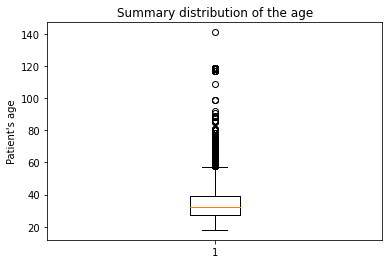

In [20]:
# Creating boxplot to check if there are outliers in age variable
plt.boxplot(df1['age'])
plt.title('Summary distribution of the age')
plt.ylabel("Patient's age")
plt.show();

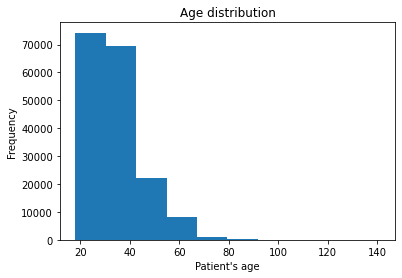

In [21]:
# Creating plot
plt.hist(df1['age'])
plt.title('Age distribution')
plt.xlabel("Patient's age")
plt.ylabel("Frequency")
plt.show();

## Assumptions on age.
According to the both plots (Histogram and boxplot) variable age have some outliers, in my point of view most of the people died before celabrating $100^{th}$ birthay, so the age above 90 will be consiedered as an outliers and they will excluded from the data.

In [22]:
# removing age abova 90.
df1 = df1.drop(df1[df1.age>90].index)

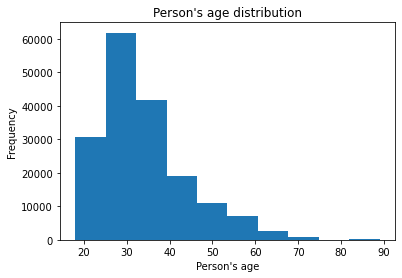

In [23]:
# Creating plot
plt.hist(df1['age'])
plt.title("Person's age distribution")
plt.xlabel("Person's age")
plt.ylabel("Frequency")
plt.show();

Data had a lot of annomalies that were removed to make tidy, so missing values was removed which result in reducing sample size of the data. Some columns were in wrong format, where starting and end time were converted to time format, so days of were extracted for further analysis. There was a variable which contained information of time in sec, it was transformed into minute. Some assumptions were made on people's age to remove somee range of age. At the end unnecessarily columns were dropped out of the data set.

## Univariate Exploration

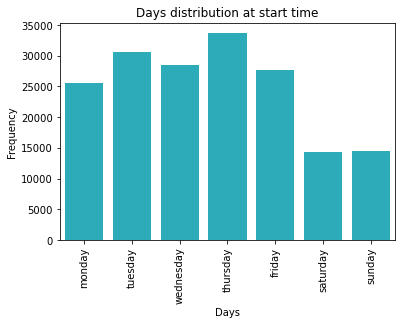

In [24]:
# Days time 
bcolor = sns.color_palette()[9]
orderd =  ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
sns.countplot(data=df1, x='days', color=bcolor, order=orderd)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation= 90)
plt.title('Days distribution at start time');

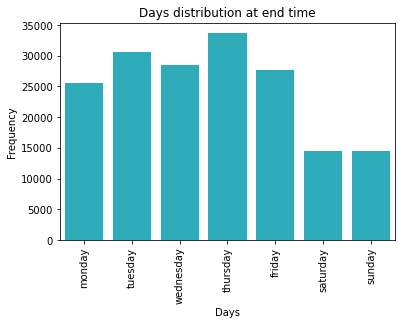

In [25]:
# 1. Time by months 
bcolor = sns.color_palette()[9]
orderd =  ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
sns.countplot(data=df1, x='daye', color=bcolor, order=orderd)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation= 90)
plt.title('Days distribution at end time');

The distribution of days were the same for two periods.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [26]:
# removing gender factor
df2 = df1.drop(df1[df1.Gender=='Other'].index)

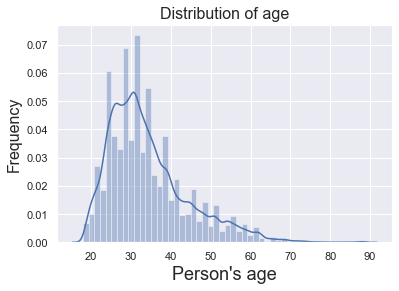

In [27]:
# Minute distribution 
sns.set_theme(style="darkgrid")
sns.distplot(df1.age , kde=True);
plt.xlabel("Person's age", fontsize=18);
plt.ylabel('Frequency', fontsize=16);
plt.title('Distribution of age', fontsize=16);

The histogram showed that, the distribution were right skwed, where the majority of the people were between 20 and 40.

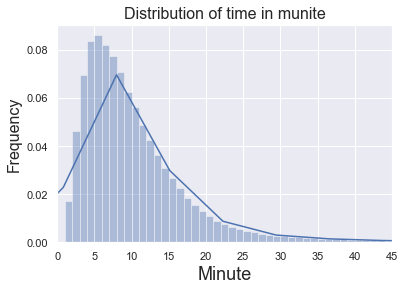

In [28]:
# Minute distribution 
bins = np.arange(0,df1.Minute.max()+5)
sns.set_theme(style="darkgrid")
sns.distplot(df1.Minute, bins = bins , kde=True);
plt.xlim((0,45));
plt.xlabel('Minute', fontsize=18);
plt.ylabel('Frequency', fontsize=16);
plt.title('Distribution of time in munite', fontsize=16);

Simiraly, the distribution of the time right skwed. Most poeple tend to used their bike between 5 and 15 minute.

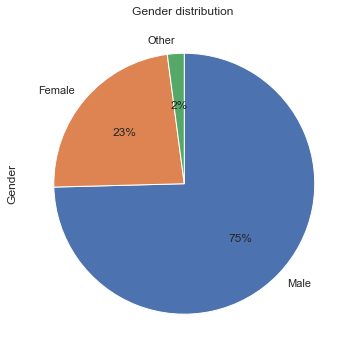

In [29]:
df1.Gender.value_counts().plot(kind = 'pie', figsize = (8,6), startangle = 90, counterclock = False, autopct='%.0f%%');
plt.title("Gender distribution ");

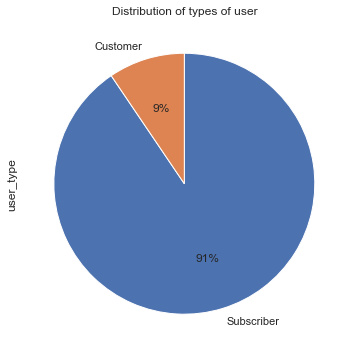

In [30]:
df1.user_type.value_counts().plot(kind = 'pie', figsize = (8,6), startangle = 90, counterclock = False, autopct='%.0f%%');
plt.title("Distribution of types of user");

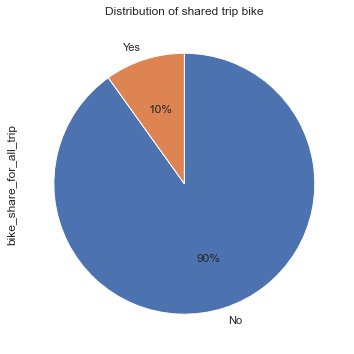

In [31]:
df1.bike_share_for_all_trip.value_counts().plot(kind = 'pie', figsize = (8,6), startangle = 90, counterclock = False, autopct='%.0f%%');
plt.title("Distribution of shared trip bike");

In mojority, the people were male, and they were subscribe and they did not ride the shared bike.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The mojority of the people started used the bike on thursday and least in weekend.
- None of the distribution of quantitative variables were normal (due to outliers).
- Most of the people used the bike were male

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The ridding time had an unusual distribution.
- It was strange to see people aged above 100 were able to rid bike.
- In real world there are two gender (male and female), while in this data there the thrid category called other.

## Bivariate Exploration

Checking distribution of the Minute and age accronding to gende

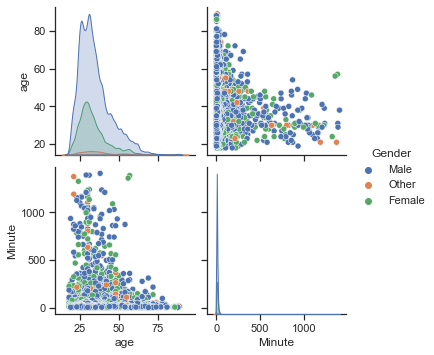

In [32]:
sns.set_theme(style="ticks")
sns.pairplot(df1, hue="Gender")

The pair plot showed that the age distribution by gender, in majority male were older that female. Relation between age and minute used to ride a bike from on start to end station were not linear.

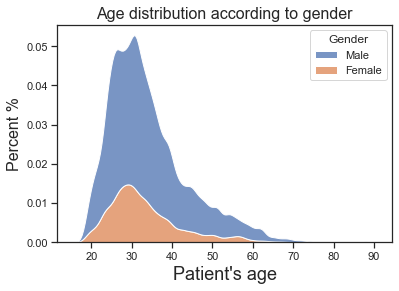

In [33]:
sns.kdeplot(data=df2, x='age',hue='Gender',multiple='stack')
plt.xlabel("Patient's age", fontsize=18)
plt.ylabel('Percent %', fontsize=16)
plt.title('Age distribution according to gender', fontsize=16);

The male people in dataset were older than counterpart female.

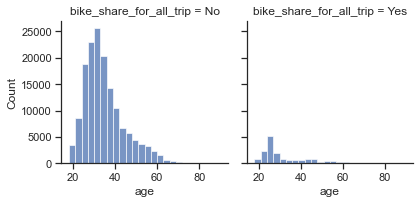

In [34]:
sns.displot(
    df2, x="age", col="bike_share_for_all_trip",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
);

The old people tend to used their owner bike for trip, while the youngest one used the shared bike in trip.

In [35]:
def mp1(df,x1,y1):
    g = sns.barplot(
    data=df,
    x=x1, y=y1)
    x=x1.replace("_"," ")
    y=y1.replace("_"," ")
    plt.title(f'mean of {y1} by {x1}'.title(),weight="bold")
    plt.rcParams["figure.figsize"] = (8,5)

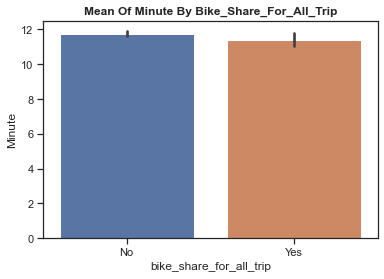

In [36]:
mp1(df1,"bike_share_for_all_trip","Minute")

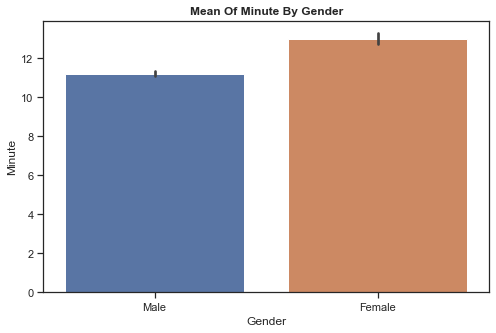

In [37]:
mp1(df2,"Gender","Minute")

Female participants used the bike for long time than male, while the time of trip were approximately equaly in both categories.

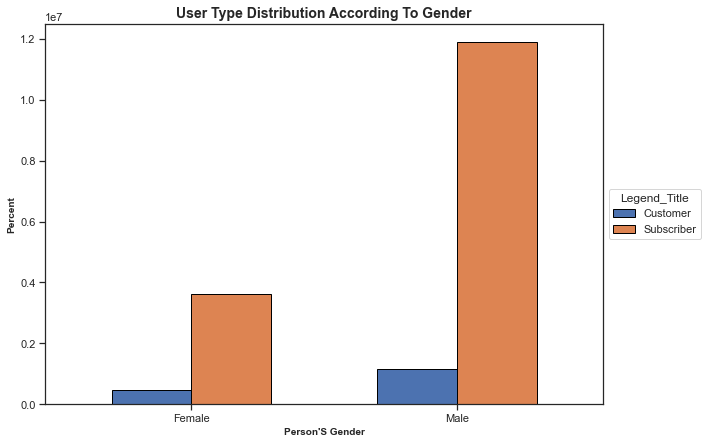

In [38]:
pd.crosstab(index=df2['Gender'], columns=df2['user_type']).mul(100).plot.bar(edgecolor='black',
                                                                figsize=[10,7],rot=0,width=0.6)
# Add title and format it
plt.title('User type distribution according to Gender'.title(), fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel("Person's gender".title(), fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Percent'.title(), fontsize = 10, weight = "bold")
# (If there is a legend, you can use this) Change legend title and format it, move legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Legend_Title", title_fontsize = 12);

As the majority were male, the distribution were user types were different totaly different in gender, as the majority of the user were subscriber.

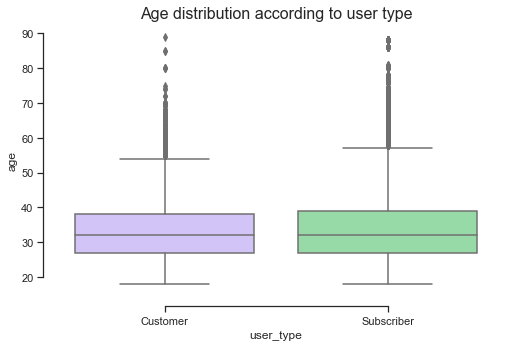

In [39]:
# Draw a boxplot to show age distribution by No show
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="user_type", y="age",
             palette=["m", "g"],
            data=df1)
sns.despine(offset=10, trim=True)
plt.title('Age distribution according to user type', fontsize=16);

Both distribution of age according to user type were approximately equal and had some outliers, with majority aged between 20 and 55.

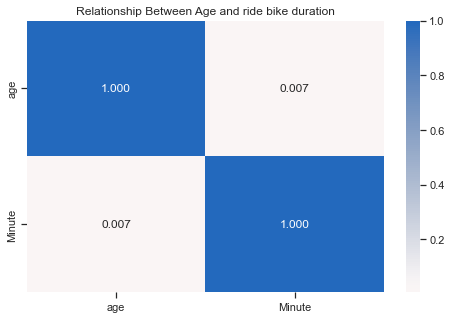

In [40]:
# 1. Numeric variables: correlation between age and duration second
quantitative_vars = ['age','Minute']
plt.figure(figsize = [8, 5])
sns.heatmap(df2[quantitative_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and ride bike duration');

From point of view, these two variable had no relatin at all.

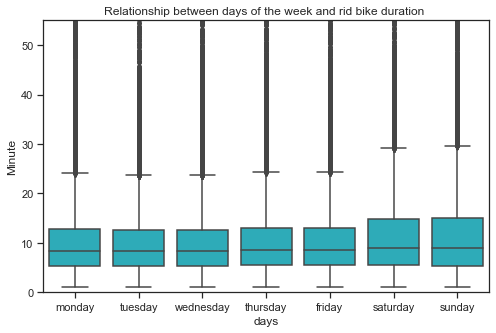

In [41]:
#plotting the Relationship between days of the week & rid duration using the Voilin Plot
sns.boxplot(data = df2, x =  df2.days , y =df2.Minute , color=bcolor , order=orderd )
plt.ylim((0,55))
plt.title("Relationship between days of the week and rid bike duration ")
plt.show()

The people tend to use the bike at the same amount of time each day of working days in week, and weekend they increased their to ride compared to other days.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- People spent a lot of time ridding the bike in weekend than in other days 
- Olde people used shared bike at lower rate compared to the young.
- Female spent a lot of time ridding than male.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Age and rid time were supposed to be nagatively related, more investugated is needed for this.

## Multivariate Exploration

In [42]:
# Defining the function of plot bar chart
def mp(df,xvar,yvar,huevar):
    g = sns.catplot(
    data=df, kind="bar",
    x=xvar, y=yvar, hue=huevar,
     palette="dark", alpha=.6)
    
    g.despine(left=True)
    xvar=xvar.replace("_"," ")
    yvar=yvar.replace("_"," ")
    huevar=huevar.replace("_"," ")
    
    g.set_axis_labels(xvar, f"mean of {yvar}".title())
    g.legend.set_title(huevar)
    g.fig.set_size_inches(10,6);
    plt.title(f'mean of {yvar} by {xvar} and {huevar}'.title(),weight="bold")

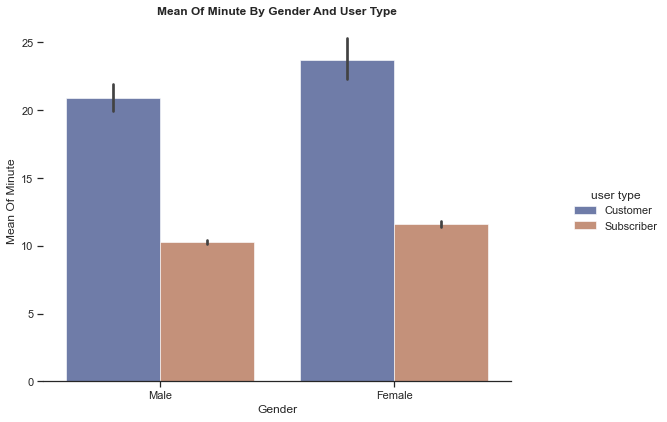

In [43]:
mp(df2,'Gender','Minute','user_type')

In majority, female spent a lot of time on bike then male as more of them were customer.

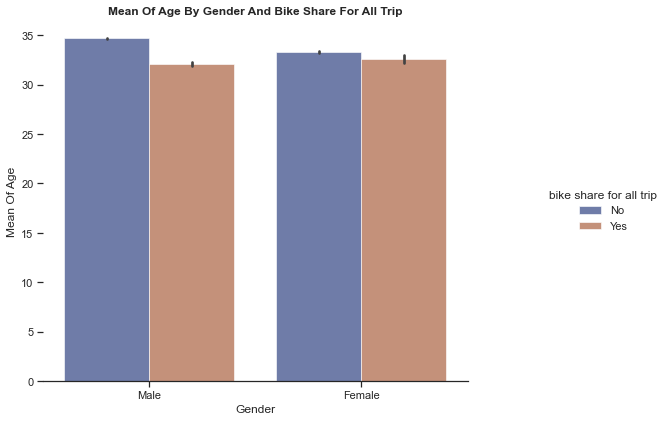

In [44]:
mp(df2,'Gender','age','bike_share_for_all_trip')

The age was approximately equal in both gander, and alot of them did not use shared bike.

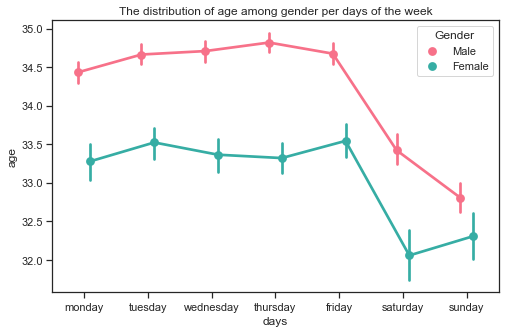

In [45]:
# Distribution plot
sns.pointplot(data = df2 , x = 'days', y = 'age', hue = "Gender",palette = 'husl', dodge = 0.2 , order = orderd)
plt.title("The distribution of age among gender per days of the week")
plt.show()

It was still indicated that female were young compared to male, as also female were fewer in ridding bike in all days of the week.

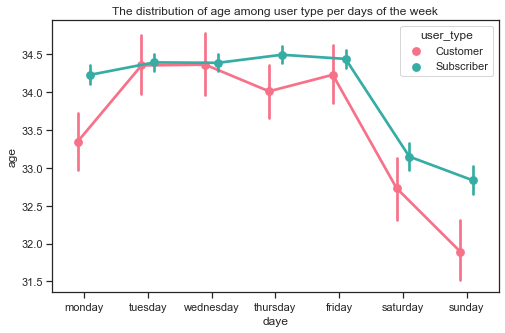

In [46]:
# Distribution plots.
sns.pointplot(data = df2 , x = 'daye', y = 'age', hue = "user_type",palette = 'husl', dodge = 0.2 , order = orderd)
plt.title("The distribution of age among user type per days of the week")
plt.show()

In some days of the week, people of in different user type and same age engaged in ridding at the same time.

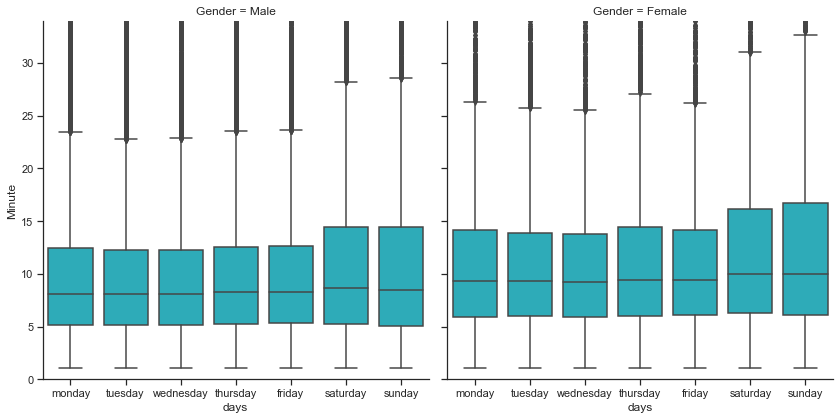

In [47]:
#using facetting to see the distribution of both duration along the days of the week for both customer and subscriber
p = sns.FacetGrid(data = df2, col = "Gender", height = 6 )
p.map(sns.boxplot, 'days', 'Minute', order = orderd , color = bcolor)
plt.ylim((0,34))
plt.show()

The female used the bike in long period of time than male in each day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- In all kind of situation female spent a lot of time in ridding than male.
- The uniform distribution on how people used the shared bike in ridding in gender and age.
- Different distribution in gender ridding across the week days.

### Were there any interesting or surprising interactions between features?

The uniform distribution on how people used the shared bike in ridding in gender and age

In [48]:
# Group by size
crosst = df2.groupby(['days', 'Minute']).size()

In [49]:
#Create a dataframe 
crosst = crosst.reset_index(name='count')

In [50]:
#.pivot()
crosst = crosst.pivot(index = 'days', columns = 'Minute', values = 'count')

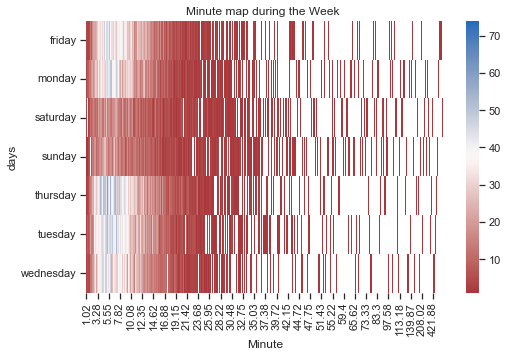

In [51]:
# plotting a heat map
sns.heatmap(crosst, cmap = 'vlag_r')
plt.yticks(rotation= 0)
plt.title("Minute map during the Week ")
plt.show()

It was showed the high ferquency were in thursday and tuesday between 3.28 and 7.82 minute every week. As time kept increase the frequency decrease, which implied negative relation between ridding bike and time.

## Conclusions

> The analysis was based on 183412 collected from Son francisco in 2019. The variable of interest were user type, Gender, bike share for all trip, days, age, Minute.

> The distribution of age indicated that, on the majority as people get older tend to do not use the shared and male were odler than female, while the young enjoy using the shared bike in the trip. Moreover, the largest portion of them were subscriber. Additionally, the female tend to spend a lot of time in ridding.

> The findings indicated that people spent a lot of time ridding the bike in weekend than in other days. Also, old people used shared bike at lower rate compared to the young.

> In conclusion, it was notable that the distribution of gender, age of the people, were totaly different. The results undersore how working days as few people used to rid bike in those days.

> As recommend, the more data are needed to explore and understand the reason behind female low rate in ridding bike and why old did not use shared bike at the same level the young one. The dataset contain information on location, and station name, it would be better if people's location were added and station nane are categoried.
